<a href="https://colab.research.google.com/github/Shantanuh10/Ted-Talk-Views-Prediction-Project/blob/main/Capstone_project_2_Ted_Talks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<font size="+3" color='#053c40'><b> $Ted$ $Talk$ $Views$ $Prediction$ </b></font>**


---


#<font size="+2" color='#053c96'><b> About this Project </b></font>

This is a Machine Learning Capstone Project, which is part of AlmaBetter's Data Science Pro Program Curriculum.



---




#<font size="+2" color='#053c96'><b> Problem Statement </b></font>

TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages.


Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.

The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.





---

#<font size="+2" color='#053c96'><b> Dataset Information </b></font>


*   Number of instances: 4,005
*   Number of attributes: 19

---

#<font size="+2" color='#053c96'><b> Understanding the Data </b></font>

The dataset contains features like:

* talk_id: Talk identification number provided by TED

* title: Title of the talk

* speaker_1: First speaker in TED's speaker list

* all_speakers: Speakers in the talk

* occupations: Occupations of the speakers

* about_speakers: Blurb about each speaker

* recorded_date: Date the talk was recorded

* published_date: Date the talk was published to TED.com

* event: Event or medium in which the talk was given

* native_lang: Language the talk was given in

* available_lang: All available languages (lang_code) for a talk

* comments: Count of comments

* duration: Duration in seconds

* topics: Related tags or topics for the talk

* related_talks: Related talks (key='talk_id',value='title')

* url: URL of the talk

* description: Description of the talk

* transcript: Full transcript of the talk

---
**Target Variable :**

* 'views': Count of views

**Goal: The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.**
#<font size="+2" color='#053c96'><b> Project Workflow </b></font>

1. Importing Libraries

2. Loading the Dataset

3. EDA on features 

4. Feature Engineering

5. Data Cleaning

6. Feature selection

7. Fitting the regression models and HyperParameter Tuning

8. Comparison of Models

9. Final selection of the model

10. Conclusion
--- 



# **1. Importing Libraries**

In [3]:
#importing the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble

import warnings
warnings.filterwarnings('ignore')

# **2. Loading the dataset**

In [4]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#loading the data file and creating a dataframe
path='/content/drive/MyDrive/Capstone Project (AlmaBetter)/Project - 2 Ted Talks  Views Prediction /data_ted_talks.csv'
df=pd.read_csv(path)

# **3. Exploratory Data Analysis**

In [6]:
#let's print the shape of the dataset.
df.shape

(4005, 19)

* No of records: 4005

* No of columns: 19

* Target Variable: 'views

In [7]:
#printing the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

* In this dataset, we have only 3 numerical columns out of which 1 is our target variable and 2 can be used as features and rest all columns are either categorical or they contains textual data.

* So, our main goal here is to find or generate some numerical columns from these columns.

In [8]:
#printing the head of the dataset
df.head(2)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."


**Checking for duplicate rows**

In [9]:
#checking for duplicacy in the dataset
df.duplicated().sum()

0

**The dataset doesn't contain any duplicate rows**

**3.1 Checking Null Values**

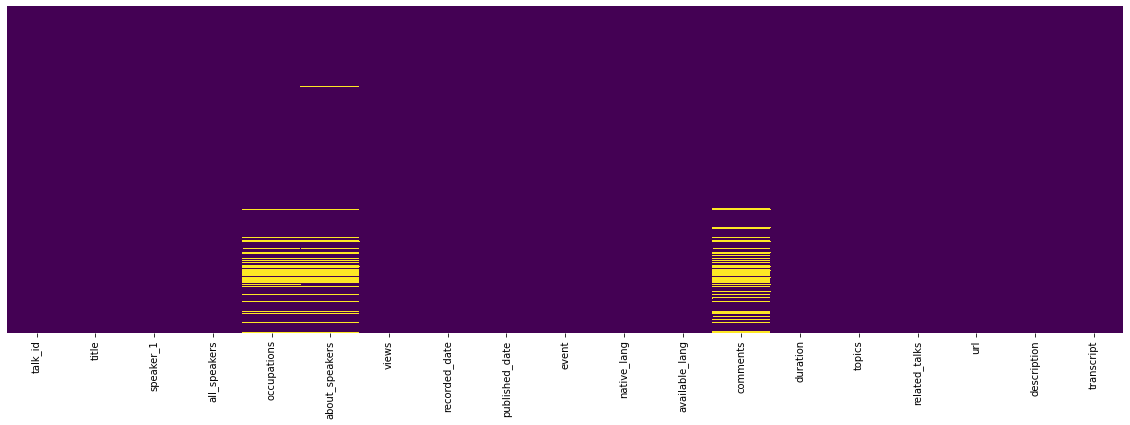

In [11]:
#checking the missing data in the dataset
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.rcParams['figure.figsize'] = (20, 8)

The dataset contains NaN values in few columns like:

* all_speakers

* occupations

* about_speakers

* comments

* recorded_date

In [12]:
#checking for NaN values
df.isna().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

**Dropping the url column as it is of no use for us**

In [13]:
#dropping the url column
df=df.drop(columns=['url'])

**3.2 Let's explore speaker_1 column**

Speakers of top 5 most watched video

In [14]:
#Extarcting the records of top 5 most viewed videos
pop_df=df.nlargest(5, ['views'])
pop_df[['speaker_1','views','title']]

,speaker_1,views,title
4,Sir Ken Robinson,65051954,Do schools kill creativity?
1296,Amy Cuddy,57074270,Your body language may shape who you are
2062,James Veitch,56932551,This is what happens when you reply to spam email
646,Simon Sinek,49730580,How great leaders inspire action
796,Brené Brown,47544833,The power of vulnerability


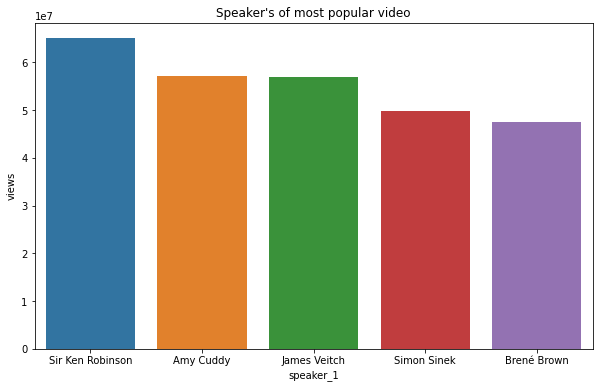

In [15]:
#plotting Speaker's of most popular video
plt.figure(figsize=(10,6))
plt.title("Speaker's of most popular video")
sns.barplot(x='speaker_1',y='views',data=pop_df)